<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/EvaluationDtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import all libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,auc,roc_curve

In [11]:
#creat synthetic dataset:
np.random.seed(42)
n_samples = 300
age = np.random.randint(30, 80, n_samples)
chol = np.random.randint(150, 300, n_samples)
thalach = np.random.randint(90, 200, n_samples)


risk_score = 0.03*(age-40) + 0.02*(chol-200) - 0.02*(thalach-140)
prob = 1/(1+np.exp(-0.05*risk_score))   # using "sigmoid function" we calculated the probability.
# risk = np.random.binomial(1, prob, n_samples)   --> this will split the data at 70%
risk = (prob >= np.median(prob)).astype(int)      #-> this will split the data at 50% (this is better for us)
df = pd.DataFrame({'age': age, 'chol': chol, 'thalach': thalach, 'risk': risk})
df

,age,chol,thalach,risk
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
...,...,...,...,...
295,62,207,188,0
296,53,297,104,1
297,40,210,153,0
298,78,276,178,1


In [12]:
#split the dataset:
X = df[["age","chol","thalach"]]
y = df["risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#creat the model and fit the model..
pred_heart = DecisionTreeClassifier(max_depth=4,random_state=42)
pred_heart.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
#creat confusion matrix: ( step : 01)
y_pred = pred_heart.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[23,  3],
       [ 6, 28]])

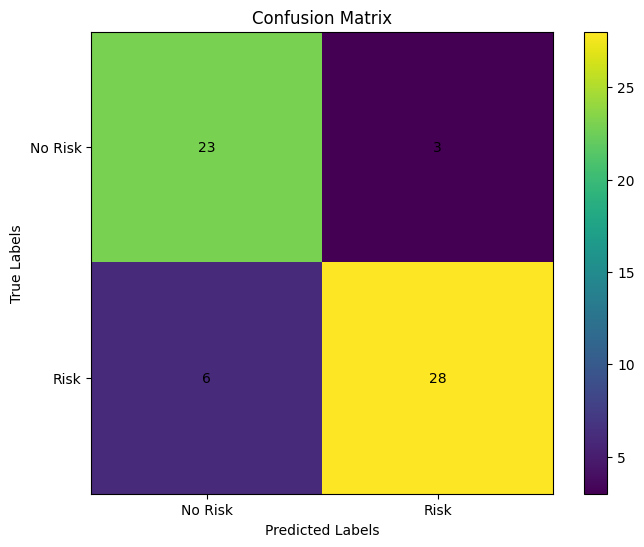

In [21]:
#plot the confusion matrix: ( step : 02)
fig,ax = plt.subplots(figsize=(8,6))
im = ax.imshow(cm,interpolation='nearest')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['No Risk','Risk'])
ax.set_yticklabels(['No Risk','Risk'])


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j,i,cm[i,j],ha='center',va='center')

plt.colorbar(im)
plt.show()

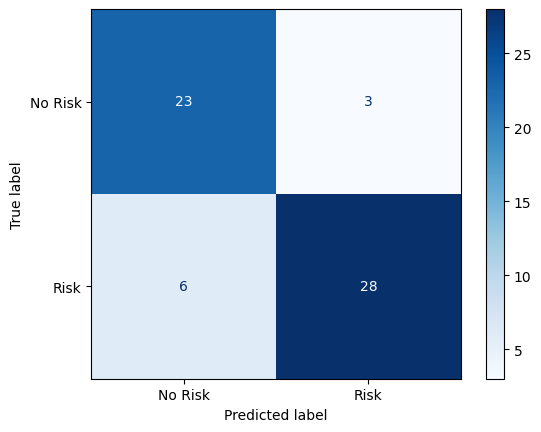

In [25]:
# Confusion matrix creat and plot the confusion matrix:- ( confusion matrix created by default and plotting of the confusion matrix is done by the function )
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Risk', 'Risk'], cmap='Blues')

In [28]:
#lets findout Accuracy,Precision,Recall,F1 score :
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Accuracy: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1 score: ",f1)

Accuracy:  0.85
Precision:  0.9032258064516129
Recall:  0.8235294117647058
F1 score:  0.8615384615384616


In [31]:
#predicted probability for true positive:
y_proba = pred_heart.predict_proba(X_test)[:,1]
y_proba

array([0.875     , 0.        , 0.04761905, 0.        , 0.875     ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.04761905, 0.125     , 0.        , 0.        ,
       0.        , 0.875     , 1.        , 0.875     , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.04761905, 1.        , 0.        , 0.875     , 0.08333333,
       0.08333333, 0.04761905, 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.875     , 0.        , 0.        , 0.        , 0.        ,
       0.8       , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.04761905, 0.08333333, 0.04761905, 1.        , 0.        ])

In [34]:
#Roc curve and Auc
fpr,tpr,thresholds = roc_curve(y_test,y_proba)
roc_auc = auc(fpr,tpr)
roc_auc

np.float64(0.925339366515837)

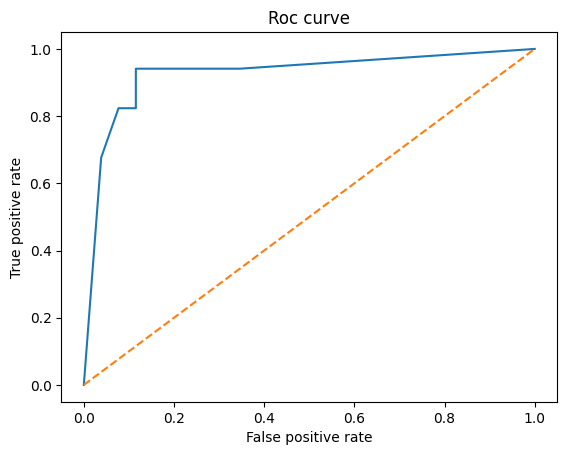

In [35]:
#plot:
plt.figure()
plt.plot(fpr,tpr,label=f'Roc curve (Auc = {roc_auc:.3f})')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Roc curve')
plt.show()